# Overlap II
To test overlap theory in the right interval. The right interval is the place where there is both sucessfull recall and activity in the hidden layer

In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set(font_scale=3.0)

In [2]:
from network import MinaNetwork

## Two orthogonal patterns

In [47]:
### Structure paramters
n_input = 200  # Inputs size
n_recurrent = 200  # C3 size
v = 21.0   # Input - C3 connection
b = 21.0   # Input - C1 connection
Kr = 0.65   # Recurrent self-inhibition gain
Ki = 0.0  # Input - C3 inhibition
Ci = 1.0  # Inhibition from the input to C1
Cr = 0.65  # Inhibition from C3 to C1
p = 1.0   # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Training parameters
training_time = 100
epsilon = 0.1

# Instantiate the network
nn = MinaNetwork(n_input=n_input, n_recurrent=n_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

# Build the patterns
number_of_patterns = 20
sparsity = 5.0
nn.build_patterns_dictionary(number_of_patterns=number_of_patterns, sparsity=sparsity)

In [48]:
# Training
sequence1 = [0, 1, 2, 3, 4]
sequence2 = [8, 9, 10, 11, 12]
epsilon = 0.1
training_time = 200

nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence1)
nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence2)

{}

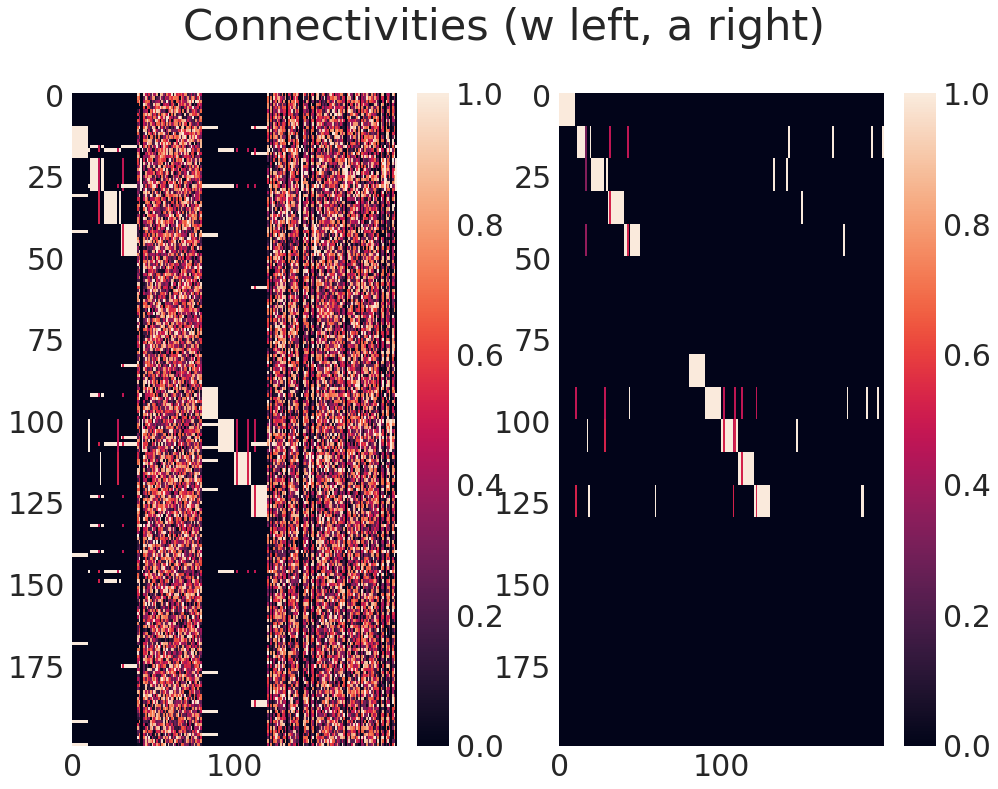

In [49]:
nn.plot_weight_matrices()

In [52]:
success, z = nn.test_recall(sequence2)
print('success', success)

success 100.0


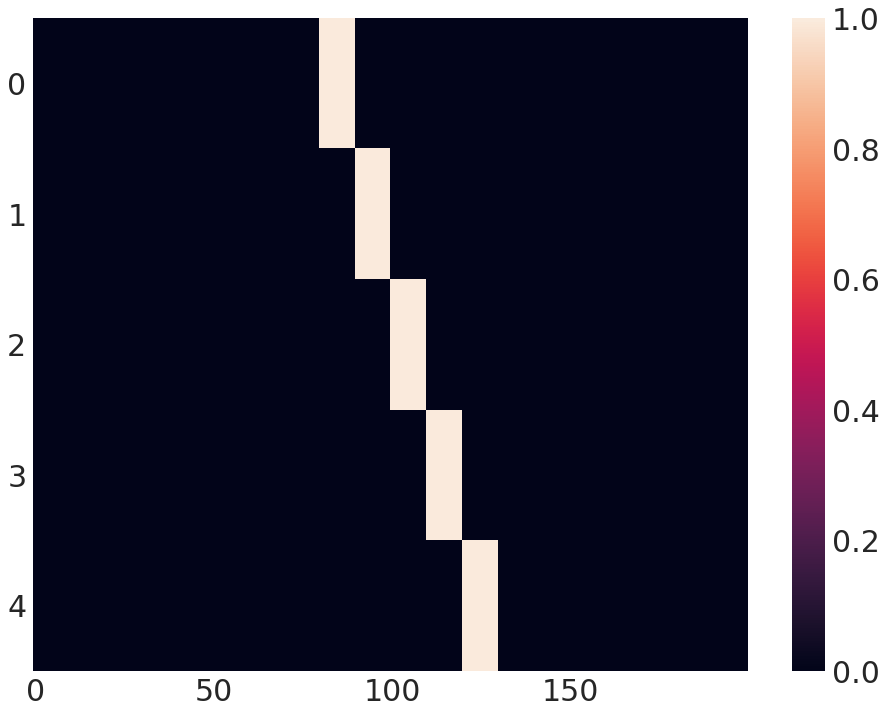

In [53]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(z, aspect='auto')

ax.grid()

fig.colorbar(im, ax=ax);

## Overlap

In [72]:
### Structure paramters
n_input = 200  # Inputs size
n_recurrent = 200  # C3 size
v = 21.0   # Input - C3 connection
b = 21.0   # Input - C1 connection
Kr = 0.85   # Recurrent self-inhibition gain
Ki = 0.0  # Input - C3 inhibition
Ci = 0.0  # Inhibition from the input to C1
Cr = 0.85  # Inhibition from C3 to C1
p = 1.0  # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Training parameters
training_time = 100
epsilon = 0.1

# Instantiate the network
nn = MinaNetwork(n_input=n_input, n_recurrent=n_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

# Build the patterns
number_of_patterns = 20
sparsity = 5.0
nn.build_patterns_dictionary(number_of_patterns=number_of_patterns, sparsity=sparsity)

# Training
sequence1 = [ 0,  1,  9,  2,  3,  4,  5,  6]
sequence2 = [12, 13, 9, 14, 15, 16, 17, 18]
epsilon = 0.1
training_time = 200
pre_synaptic_rule = True

nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence1, pre_synaptic_rule=pre_synaptic_rule)
nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence2, pre_synaptic_rule=pre_synaptic_rule);

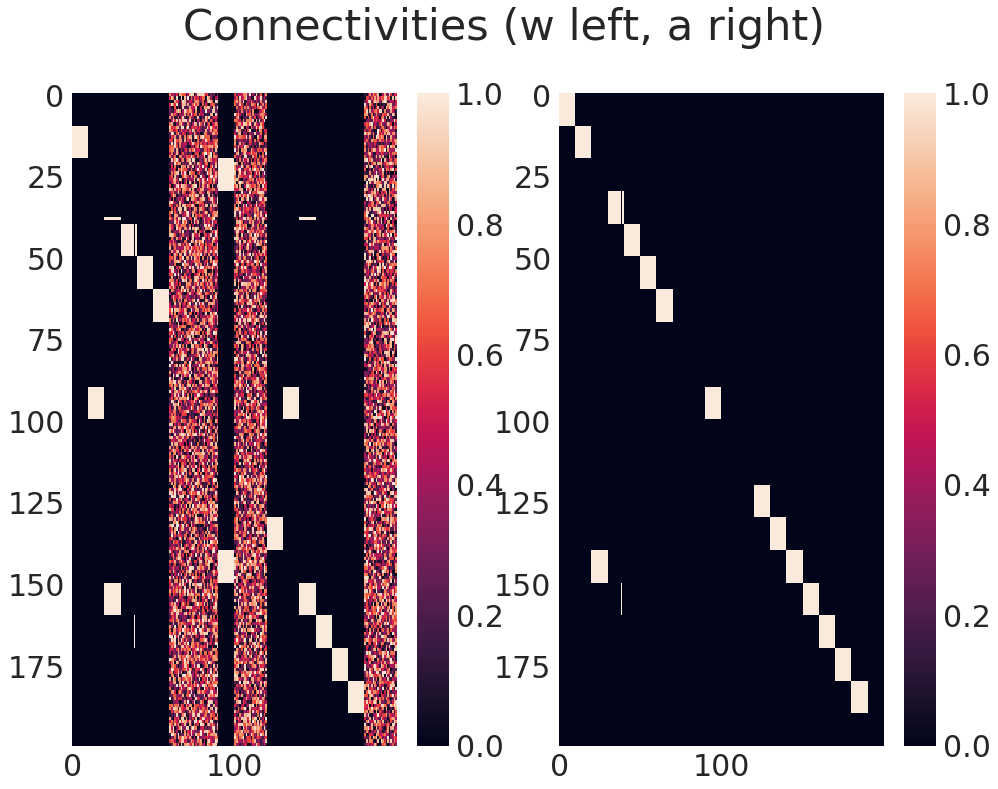

In [73]:
nn.plot_weight_matrices()

In [102]:
success, z = nn.test_recall(sequence1)
print('success', success)

success 37.5


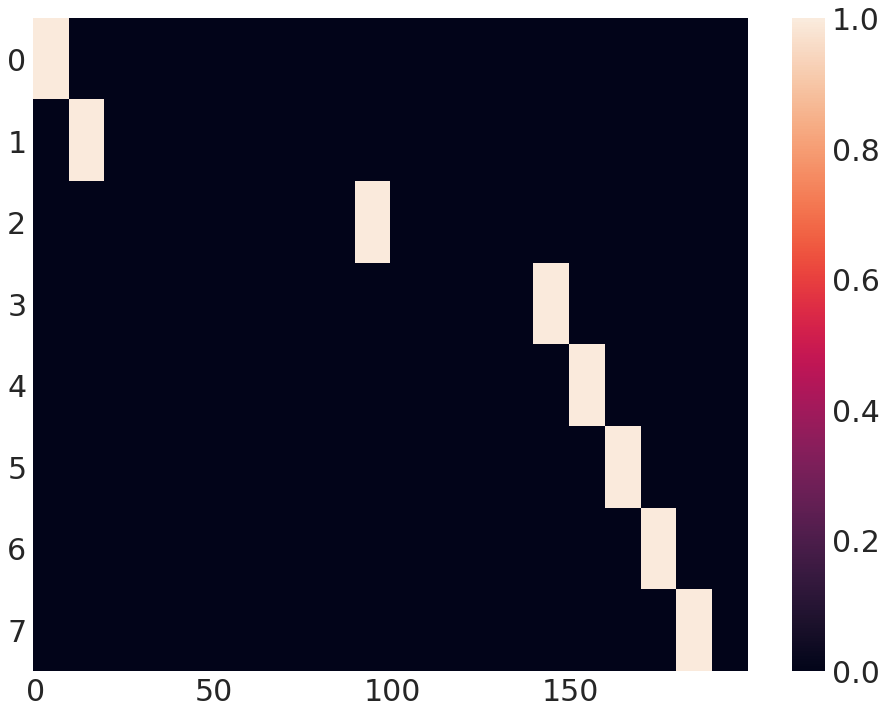

In [108]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(z, aspect='auto')

ax.grid()

fig.colorbar(im, ax=ax);

We need to extract the right indexes

In [113]:
goal_pattern = nn.patterns_dictionary[sequence1[-1]]

wrong_indexes = np.where(goal_pattern == 0)[0]
right_indexes = np.where(goal_pattern == 1)[0]

In [114]:
wrong_indexes

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

In [115]:
right_indexes

array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69])

In [116]:
z[-1][right_indexes].sum()

0.0

In [117]:
z[-1][wrong_indexes].sum()

10.0

#### Let's do this for both sequences

In [ ]:
### Structure paramters
n_input = 200  # Inputs size
n_recurrent = 200  # C3 size
v = 21.0   # Input - C3 connection
b = 21.0   # Input - C1 connection
Kr = 0.85   # Recurrent self-inhibition gain
Ki = 0.0  # Input - C3 inhibition
Ci = 0.0  # Inhibition from the input to C1
Cr = 0.85  # Inhibition from C3 to C1
p = 1.0  # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Training parameters
training_time = 100
epsilon = 0.1

# Instantiate the network
nn = MinaNetwork(n_input=n_input, n_recurrent=n_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

# Build the patterns
number_of_patterns = 20
sparsity = 5.0
nn.build_patterns_dictionary(number_of_patterns=number_of_patterns, sparsity=sparsity)

# Training
sequence1 = [ 0,  1,  9,  2,  3,  4,  5,  6]
sequence2 = [12, 13, 9, 14, 15, 16, 17, 18]
epsilon = 0.1
training_time = 200
pre_synaptic_rule = True

nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence1, pre_synaptic_rule=pre_synaptic_rule)
nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence2, pre_synaptic_rule=pre_synaptic_rule);

In [129]:
sequences = [sequence1, sequence2]

right_scores = []
wrong_scores = []

for sequence in sequences:
    success, z = nn.test_recall(sequence)
    goal_pattern = nn.patterns_dictionary[sequence[-1]]

    wrong_indexes = np.where(goal_pattern == 0)[0]
    right_indexes = np.where(goal_pattern == 1)[0]

    right_score =  z[-1][right_indexes].sum()
    wrong_score = z[-1][wrong_indexes].sum()
    
    right_scores.append(right_score)
    wrong_scores.append(wrong_score)
    
print('right scores', right_scores)
print('wrong scores', wrong_scores)

right scores [0.0, 10.0]
wrong scores [10.0, 0.0]


#### Let's do this for different values of Kr

In [187]:
### Structure paramters
n_input = 200  # Inputs size
n_recurrent = 400 # C3 size
v = 21.0   # Input - C3 connection
b = 21.0   # Input - C1 connection
Kr = 0.85   # Recurrent self-inhibition gain
Ki = 0.0  # Input - C3 inhibition
Ci = 0.0  # Inhibition from the input to C1
Cr = 0.85  # Inhibition from C3 to C1
p = 1.0  # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

dt = 0.05
Kr_vector = np.arange(0.3, 1 + dt, dt)

In [188]:
right_scores_history = []
wrong_scores_history = []

for Kr in Kr_vector:
    # Instantiate the network
    nn = MinaNetwork(n_input=n_input, n_recurrent=n_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                     theta=theta, phi=phi, uniform_w=False)

    # Build the patterns
    number_of_patterns = 20
    sparsity = 5.0
    nn.build_patterns_dictionary(number_of_patterns=number_of_patterns, sparsity=sparsity)

    # Training
    sequence1 = [ 0,  1,  9,  2,  3,  4,  5,  6]
    sequence2 = [12, 13, 9, 14, 15, 16, 17, 18]
    epsilon = 0.1
    training_time = 200
    pre_synaptic_rule = True

    nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence1, pre_synaptic_rule=pre_synaptic_rule)
    nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence2, pre_synaptic_rule=pre_synaptic_rule)
    
    
    sequences = [sequence1, sequence2]

    right_scores = []
    wrong_scores = []

    for sequence in sequences:
        success, z = nn.test_recall(sequence)
        goal_pattern = nn.patterns_dictionary[sequence[-1]]

        wrong_indexes = np.where(goal_pattern == 0)[0]
        right_indexes = np.where(goal_pattern == 1)[0]

        right_score =  z[-1][right_indexes].sum() / nn.neurons_per_pattern
        wrong_score = z[-1][wrong_indexes].sum() / nn.neurons_per_pattern

        right_scores.append(right_score)
        wrong_scores.append(wrong_score)
    
    right_scores_history.append(right_scores)
    wrong_scores_history.append(wrong_scores)


In [189]:
x = np.array(right_scores_history) 
y = np.array(wrong_scores_history)

right_results = np.mean(x, axis=1)
wrong_results = np.mean(y, axis=1)

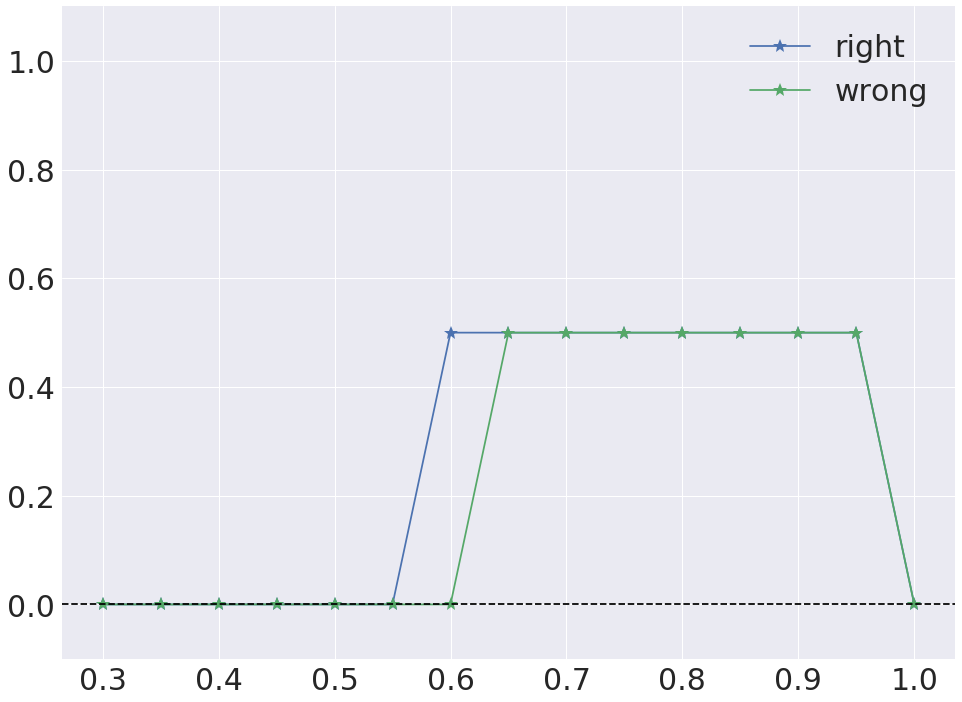

In [190]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.plot(Kr_vector, right_results, '*-', markersize=15, label='right')
ax.plot(Kr_vector, wrong_results, '*-', markersize=15, label='wrong')

ax.axhline(0, color='black', linestyle='--')

ax.set_ylim([-0.1, 1.1])
ax.legend();